In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import operator
from matplotlib.pyplot import subplot
import os
import h5py


d = os.getcwd() #Gets the current working directory
print(d)
dirname='gsfc_data_082019/' #change for operating computer
folder= '20190820_cam3_specres_02_f4/' #set to desired folder
os.chdir(dirname+folder)
d = os.getcwd() #Gets the current working directory
print(d)


/Users/kirahart/Dropbox/SWIRP_data
/Users/kirahart/Dropbox/SWIRP_data/gsfc_data_082019/20190820_cam3_specres_02_f4


In [2]:
#set up plotting
plt.style.use('seaborn-whitegrid')

#experimental parameters
lambda_res = 94 #nm
waves=np.arange(8000,13000,50) #nm for import
waves_um=np.arange(8,13,.05) #micron for plotting

#this is not consistent, need to change depending on file
fname_head= 'spectral_1_CAM1__' 
fname_tail= 'nm_angleNA.tiff'

#location of illuminated pixels
row_i=155
row_f=165
col_i=175
col_f=180

In [12]:
def importdata(fname_head, fname_tail):
    avg=[]
    std=[]
    for i in range(len(waves)):
    #note this naming convention hasn't been consistent in ALL data sets
        if waves[i]<10000:
            name=fname_head+'0'+str(waves[i])+fname_tail
        else:
            name=fname_head + str(waves[i])+fname_tail
        image=Image.open(name)
        im=np.array(image)#[row_i:row_f,col_i:col_f]
        avg.append(np.mean(im))
        std.append(np.std(im))
    return(avg, std)

In [13]:
mean,std=importdata(fname_head, fname_tail)
normalized_mean=np.divide(mean,np.max(mean))
normalized_std=np.divide(std,np.max(mean))

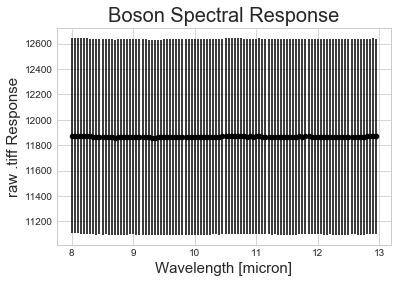

In [14]:
plt.errorbar(waves_um,mean,yerr=std, marker='.',ls='',c='black',label='camera 1',markersize=9)
plt.xlabel('Wavelength [micron]',size=15)
plt.ylabel('raw .tiff Response',size=15)
plt.title('Boson Spectral Response',size=20)
plt.show()

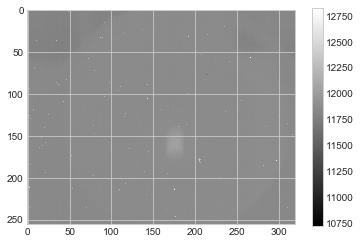

In [18]:
i=31
name=fname_head+'0'+str(waves[i])+fname_tail
image=Image.open(name)
im=np.array(image)
s=np.std(im)
c=np.median(im)
m=np.mean(im)
im[im >= m+2*s] = c
im[im <= m-2*s] = c
p=plt.imshow(im,cmap="binary_r")
plt.colorbar(p)
plt.show()

In [16]:
boson_corr=np.subtract(mean ,11915)
boson_corr=np.divide(boson_corr,np.max(boson_corr))

In [8]:
cam1=[ 69.2, 124.4, 134. , 143.2, 124.4, 138. , 158.8, 192. , 220.8,
       226. , 254.4, 263.2, 268.4, 264.8, 238. , 236.8, 208. , 205.2,
       196.8, 196.8, 195.6, 195.6, 203.2, 200. , 200.4, 190.4, 191.6,
       195.2, 196. , 190.8, 186.8, 177.2, 170. , 158. , 157.6, 151.2,
       150.4, 137.2, 137.6, 132.4, 124. , 111.6, 110.4,  94. ,  93.2,
        86.4,  82. ,  78.8,  72. ,  75.2,  72.4,  64.8,  63.6,  59.2,
        58. ,  60. ,  49.6,  42.8,  39.2,  36. ,  34.8,  30.8,  26.8,
        24.4,  25.6,  34.4,  25.6,  22. ,  22.4,  19.2,  12. ,  16.4,
        13.2,  13.2,  10.8,  12. ,   8.8,   8.8,   6. ,   6. ,   6. ,
         7.2,   7.2,   8. ,   6.4,   5.6,   4.4,   6. ,   6. ,   5.6,
         4.4,   2. ,   2.8,   4.8,   8. ,   2.4,   6.4,   4.8,   4. ,
         4. ]

cam1=np.divide(cam1,np.max(cam1))

In [9]:
cam2=[ 63.8, 110.2, 183.8, 219.4, 281.4, 275.4, 321.8, 286.2, 271. ,
       242.6, 212.6, 219.4, 194.2, 223. , 215. , 243.4, 249.4, 244.2,
       252.6, 219. , 219. , 188.2, 207.8, 197.8, 203.8, 202.2, 188.6,
       205.4, 186.2, 205.4, 184.2, 196.2, 181.8, 186.2, 183. , 163.4,
       157.4, 147.8, 140.2, 136.6, 128.2, 123. , 113. , 108.6,  98.2,
        98.2,  97. ,  82.6,  76.6,  78.2,  73. ,  60.2,  65.8,  60.6,
        55. ,  51.8,  48.6,  47. ,  38.6,  33.8,  37. ,  33. ,  33. ,
        25.4,  30.2,  37.8,  29.4,  23.4,  17.4,  27.8,  24.2,  21. ,
        24.6,  13.8,   9.8,  12.2,   8.6,   7.4,   7.8,  11. ,   7. ,
        11.8,  16.6,   8.2,  10.6,  11.4,  13.8,  11. ,   9.4,   7.8,
         8.6,   4.6,   8.6,   6.2,   6.2,   8.6,   6.2,   6.2,   5. ,
         8.2]
cam2=np.divide(cam2,np.max(cam2))

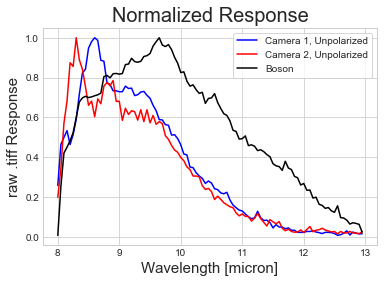

In [10]:
plt.plot(waves_um,cam1,'blue',label='Camera 1, Unpolarized')
plt.plot(waves_um,cam2,'red',label='Camera 2, Unpolarized')
plt.plot(waves_um,boson_corr,'black',label='Boson')
plt.xlabel('Wavelength [micron]',size=15)
plt.ylabel('raw .tiff Response',size=15)
plt.title('Normalized Response',size=20)
plt.legend(frameon=True)
plt.show()

In [11]:
'''os.chdir('..')
d = os.getcwd() #Gets the current working directory
os.chdir(d +'/system_characterization')

hf = h5py.File('camera_response_data.h5', 'w')
hf.create_dataset('wavelengths', data=waves_um)
hf.create_dataset('boson_m', data=boson_corr)
hf.create_dataset('boson_std', data=np.divide(std,boson_corr))
hf.create_dataset('camera1', data=cam1)
hf.create_dataset('camera2', data=cam2)
hf.close()'''

"os.chdir('..')\nd = os.getcwd() #Gets the current working directory\nos.chdir(d +'/system_characterization')\n\nhf = h5py.File('camera_response_data.h5', 'w')\nhf.create_dataset('wavelengths', data=waves_um)\nhf.create_dataset('boson_m', data=boson_corr)\nhf.create_dataset('boson_std', data=np.divide(std,boson_corr))\nhf.create_dataset('camera1', data=cam1)\nhf.create_dataset('camera2', data=cam2)\nhf.close()"